In [1]:
# TITANIC SOTA PIPELINE (2025) - BLOQUE 1
# Configuración inicial y carga de dato

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42

# Cargar datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)

display(train.head())
display(test.head())


Train shape: (891, 12)
Test shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
# Información básica y valores nulos
print("=== TRAIN INFO ===")
train.info()
print("\n=== TEST INFO ===")
test.info()

print("\n=== Null values (train) ===")
print(train.isnull().sum())
print("\n=== Null values (test) ===")
print(test.isnull().sum())

# Estadísticas descriptivas
display(train.describe(include='all'))
display(test.describe(include='all'))


=== TRAIN INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== TEST INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


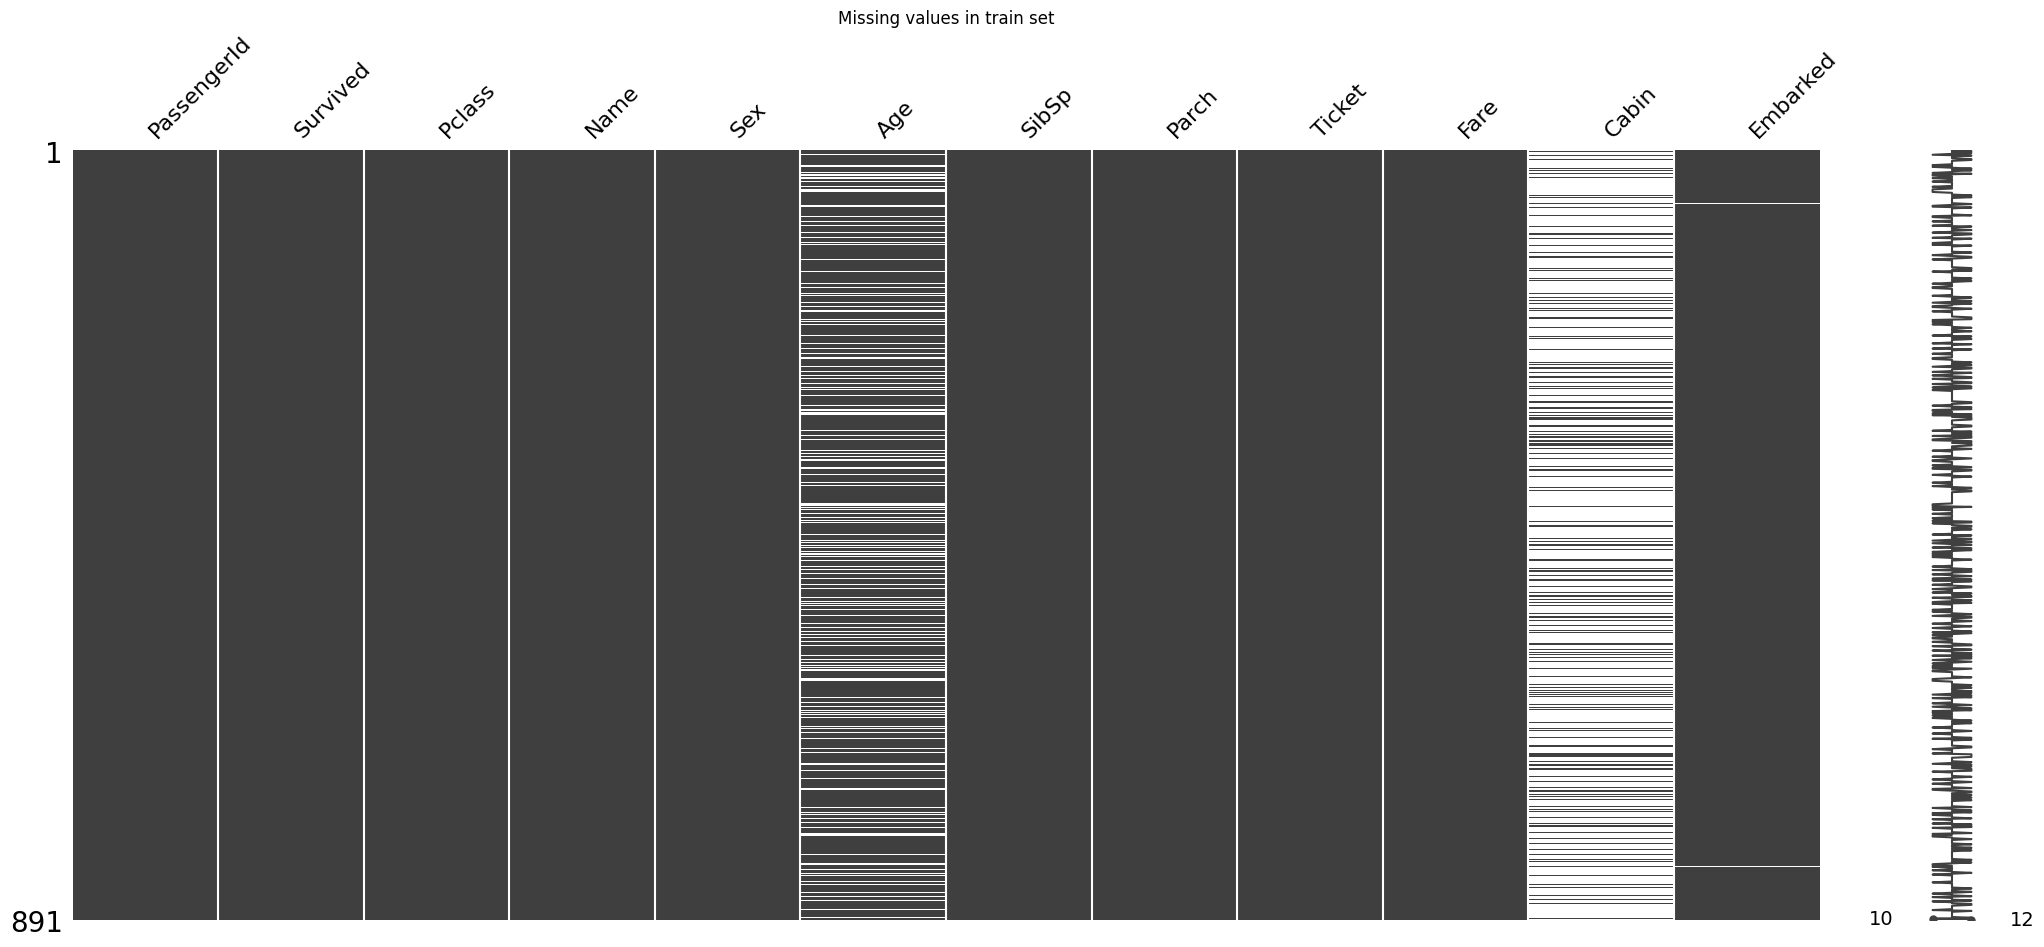

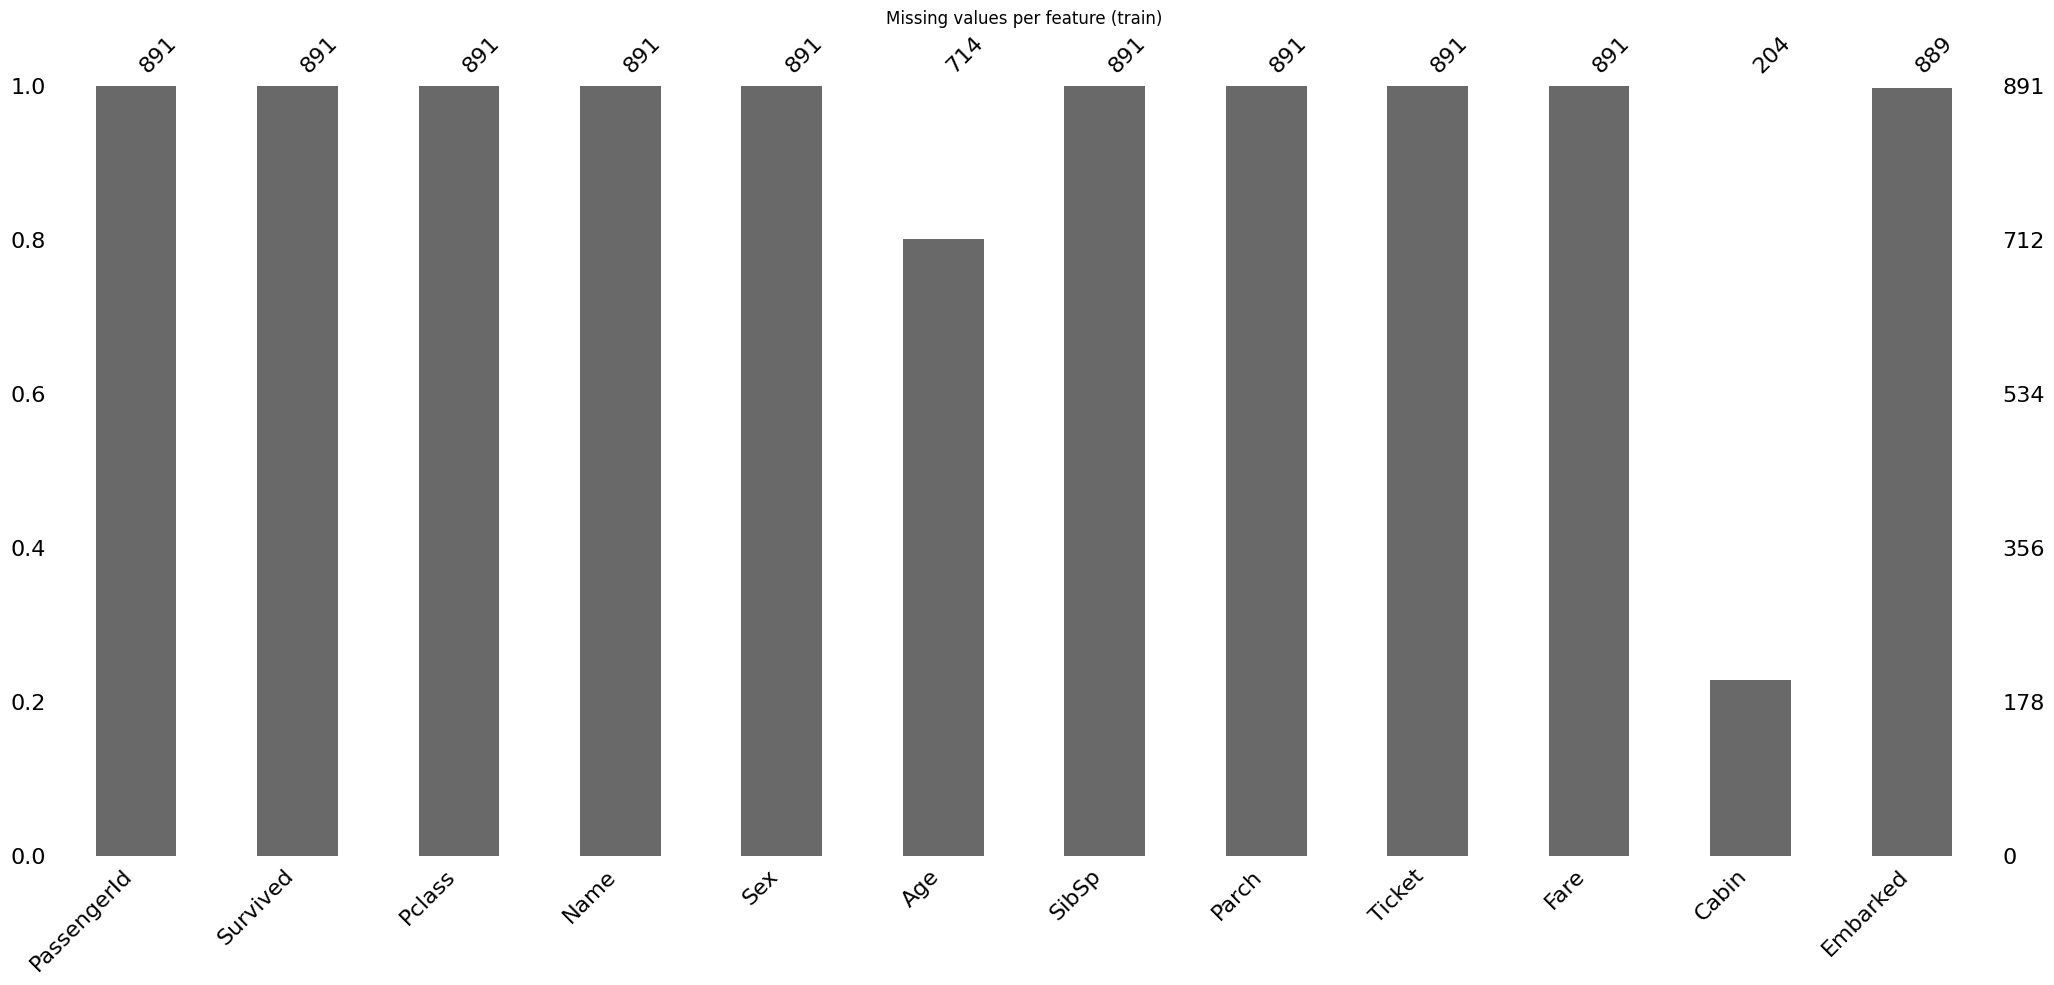

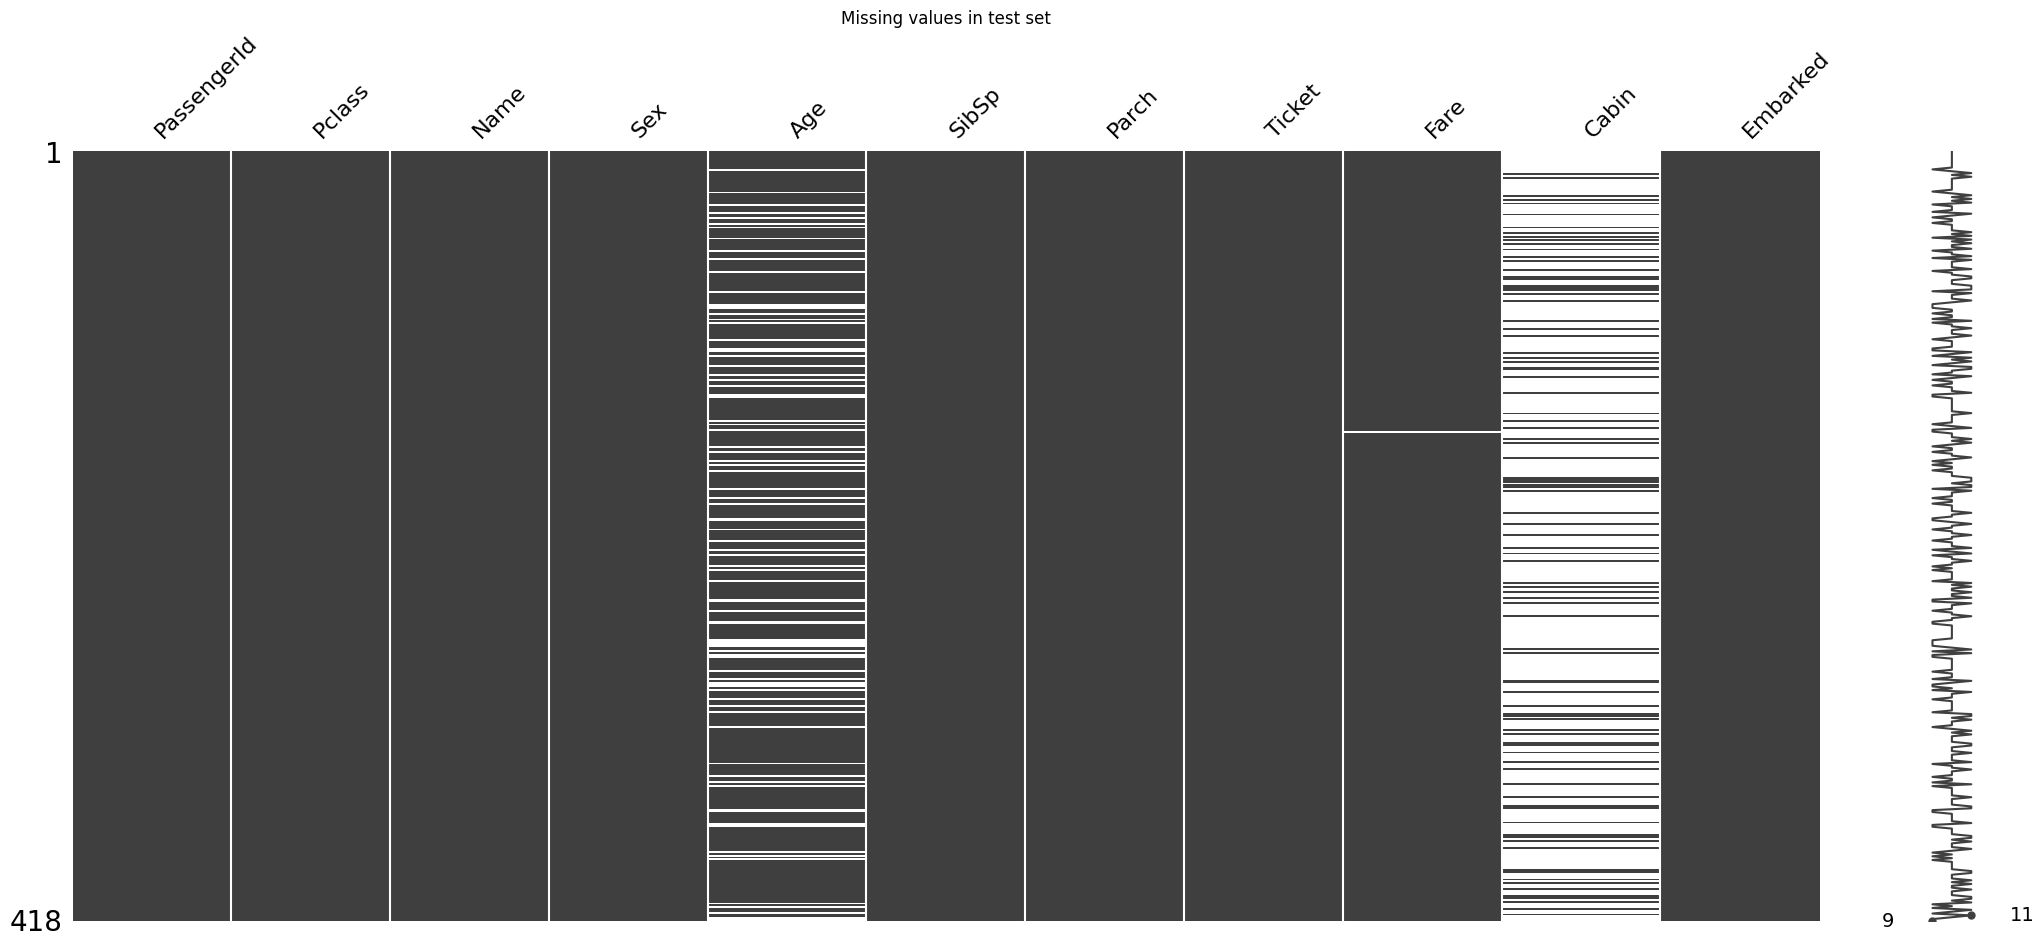

In [7]:
# Visualización de missing values
msno.matrix(train)
plt.title('Missing values in train set')
plt.show()

msno.bar(train)
plt.title('Missing values per feature (train)')
plt.show()

msno.matrix(test)
plt.title('Missing values in test set')
plt.show()


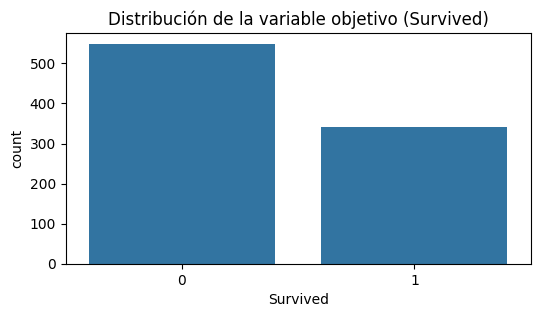

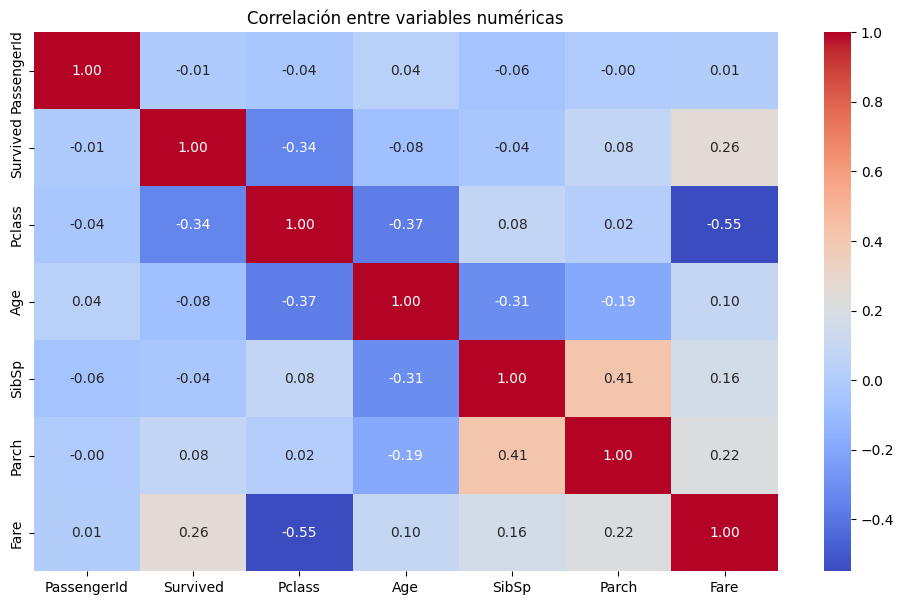

In [7]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,3))
sns.countplot(x='Survived', data=train)
plt.title('Distribución de la variable objetivo (Survived)')
plt.show()

# SOLO columnas numéricas
numeric_cols = train.select_dtypes(include=[np.number])

plt.figure(figsize=(12,7))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.show()



In [10]:
# ----------------------------------------
# 🚢 TITANIC SOTA PIPELINE (2025) - BLOQUE 2
# Feature Engineering Manual + RescuePriority + Deep Feature Synthesis (opcional)
# ----------------------------------------

import pandas as pd
import numpy as np

# --------- Feature Engineering Manual ---------
def feature_engineering_manual(df):
    # 1. Extraer Título del nombre
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

    # 2. Family Size e indicador de estar solo/a
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    # 3. Deck (primer carácter de Cabin)
    df['Cabin'] = df['Cabin'].fillna('U')
    df['Deck'] = df['Cabin'].apply(lambda x: x[0])

    # 4. Ticket Group: cuántas personas comparten el mismo ticket
    df['TicketGroup'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['TicketGroup'] = df['TicketGroup'].apply(lambda x: x if x <= 4 else 4)

    # 5. Binning y tratamiento de Fare y Age
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 120], labels=[0, 1, 2, 3])

    # 6. Embarque missing
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    # 7. Eliminar columnas irrelevantes (guardar PassengerId para el submission)
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

    # 8. NUEVO: Prioridad de salvamento histórica
    def rescue_priority(row):
        if row['Sex'] == 'female' or (row['Age'] < 15):
            return 3
        elif row['Pclass'] == 1:
            return 2
        else:
            return 1
    df['RescuePriority'] = df.apply(rescue_priority, axis=1)

    return df

train_fe = feature_engineering_manual(train.copy())
test_fe  = feature_engineering_manual(test.copy())

print("Feature engineering manual + RescuePriority completado.")
display(train_fe.head())
display(test_fe.head())



Feature engineering manual + RescuePriority completado.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck,TicketGroup,FareBin,AgeBin,RescuePriority
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,U,1,0,2,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,C,1,3,2,3
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1,1,U,1,1,2,3
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0,C,2,3,2,3
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,U,1,1,2,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Deck,TicketGroup,FareBin,AgeBin,RescuePriority
0,892,3,male,34.5,0,0,7.8292,Q,Mr,1,1,U,1,0,2,1
1,893,3,female,47.0,1,0,7.0000,S,Mrs,2,0,U,1,0,3,3
2,894,2,male,62.0,0,0,9.6875,Q,Mr,1,1,U,1,1,3,1
3,895,3,male,27.0,0,0,8.6625,S,Mr,1,1,U,1,1,2,1
4,896,3,female,22.0,1,1,12.2875,S,Mrs,3,0,U,1,1,2,3
